In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

: 

In [3]:
df = pd.read_csv(r'C:\Users\Dell\Desktop\DataSets\test_energy_data.csv')

In [4]:
df.isna().sum()

Building Type          0
Square Footage         0
Number of Occupants    0
Appliances Used        0
Average Temperature    0
Day of Week            0
Energy Consumption     0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
num_cols = [i for i in df.columns if df[i].dtypes!='object']

In [7]:
df[num_cols].corr()

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption
Square Footage,1.000000,-0.080458,-0.145933,0.030612,0.724039
Number of Occupants,-0.080458,1.000000,0.034320,-0.063608,0.308594
Appliances Used,-0.145933,0.034320,1.000000,-0.136386,0.176380
Average Temperature,0.030612,-0.063608,-0.136386,1.000000,-0.079733
Energy Consumption,0.724039,0.308594,0.176380,-0.079733,1.000000


In [8]:
df[num_cols].describe()

,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,25881.920000,47.230000,26.970000,22.043300,4187.57830
std,13711.075264,29.905526,14.237846,6.957951,832.55985
min,1161.000000,2.000000,1.000000,10.400000,2351.97000
25%,14161.000000,21.000000,16.750000,15.682500,3621.92500
50%,27582.500000,47.000000,27.500000,21.970000,4249.39000
75%,38109.500000,73.000000,39.250000,27.492500,4797.17500
max,49354.000000,99.000000,49.000000,34.710000,6042.56000


<Axes: >

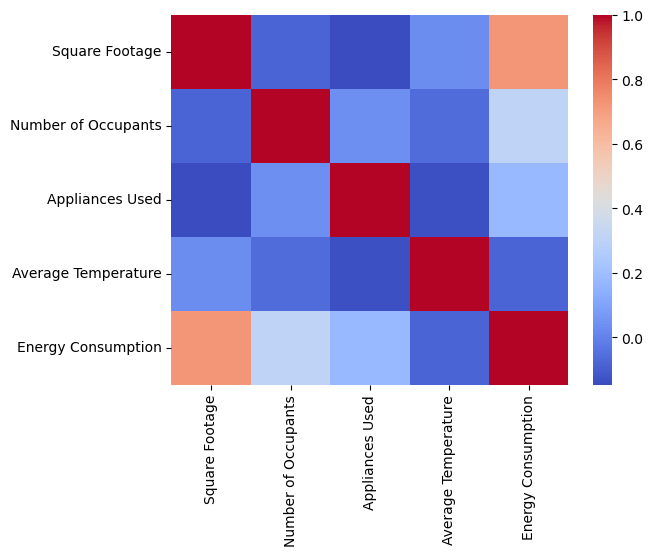

In [9]:
sns.heatmap(df[num_cols].corr(), cmap='coolwarm')

In [10]:
corr_target = df[num_cols].corr()['Energy Consumption'].drop('Energy Consumption')

min_corr = corr_target.min()
max_corr =corr_target.max()

min_fe = corr_target.idxmin()
max_fe = corr_target.idxmax()

print(f"🔻 Minimum correlation: {min_corr:.4f} with feature: '{min_fe}'")
print(f"🔺 Maximum correlation: {max_corr:.4f} with feature: '{max_fe}'")

🔻 Minimum correlation: -0.0797 with feature: 'Average Temperature'
🔺 Maximum correlation: 0.7240 with feature: 'Square Footage'


In [11]:
# sns.pairplot(df)

In [12]:
# for i in df[num_cols].columns:
#     plt.figure(figsize=(6,8))
#     sns.boxplot(df[i])
#     plt.show()

# no outliers

In [13]:
df['Day of Week'] = df['Day of Week'].map({'Weekday':0, 'Weekend':1})
df['Building Type'] = df['Building Type'].map({'Residential':0,'Commercial':1, 'Industrial':2})

In [14]:
df[['Square Footage','Energy Consumption']].describe()

,Square Footage,Energy Consumption
count,100.000000,100.00000
mean,25881.920000,4187.57830
std,13711.075264,832.55985
min,1161.000000,2351.97000
25%,14161.000000,3621.92500
50%,27582.500000,4249.39000
75%,38109.500000,4797.17500
max,49354.000000,6042.56000


In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['Square Footage'] = scaler.fit_transform(df[['Square Footage']])

In [ ]:
import pickle
pickle.dump(scaler, open('scaler.pkl', 'wb'))

In [16]:
x = df.drop('Energy Consumption',axis=1)
y = df[['Energy Consumption']]

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30,random_state=1)
model = LinearRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [18]:
from sklearn.metrics import r2_score, mean_squared_error

print(f'MSE : {mean_squared_error(y_test, pred)}')
print(f'r2_score : {r2_score(y_test, pred)*100}')

MSE : 0.0002251826518405477
r2_score : 99.99999996677711


In [19]:
y_test = np.array(y_test)

In [20]:
y_test_flat = y_test.ravel() if hasattr(y_test,'ravel') else y_test
pred_flat = pred.ravel() if hasattr(pred, 'ravel') else pred

In [21]:
pred.ndim

2

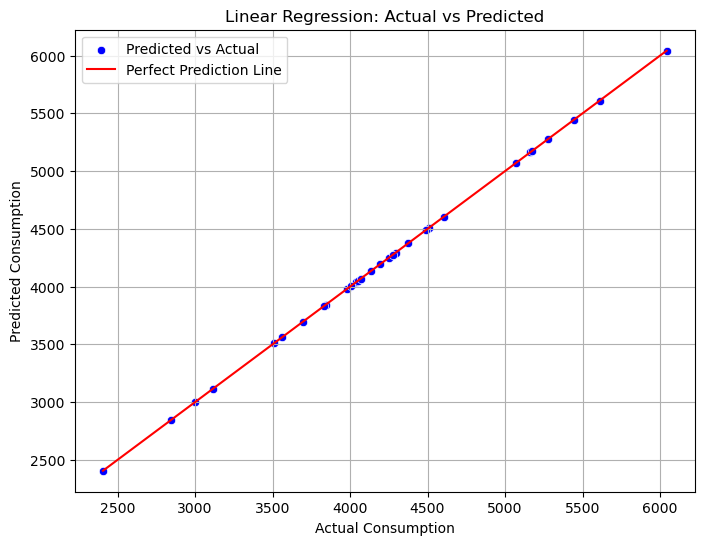

In [22]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test_flat, y=pred_flat, color='blue', label='Predicted vs Actual')
sns.lineplot(x=y_test_flat, y=y_test_flat, color='red', label='Perfect Prediction Line')

plt.xlabel('Actual Consumption')
plt.ylabel('Predicted Consumption')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.show()

In [23]:
residual = y_test-pred

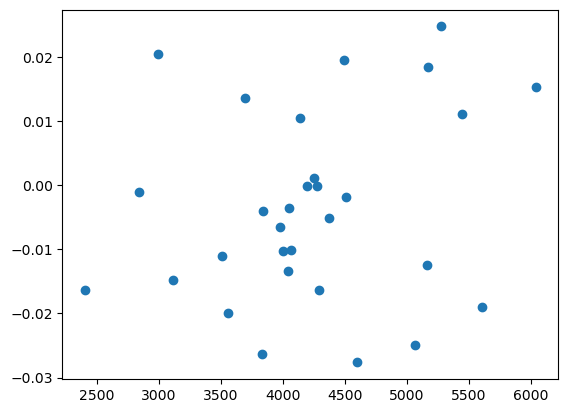

In [24]:
plt.scatter(pred, residual)

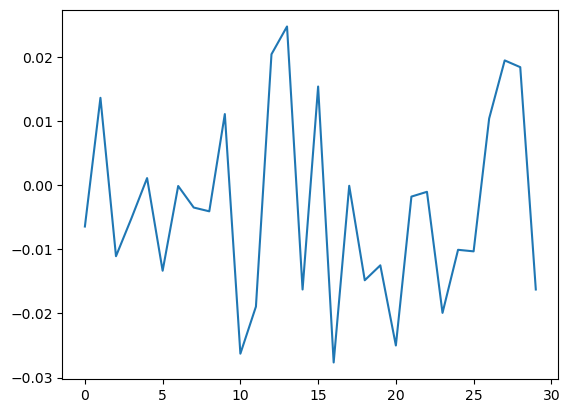

In [25]:
plt.plot(residual)

((array([-1.99833768, -1.59452553, -1.35103668, -1.1686393 , -1.01855497,
         -0.8884856 , -0.77194854, -0.66506298, -0.56529149, -0.47085985,
         -0.38045711, -0.29306636, -0.20786198, -0.12414301, -0.04128669,
          0.04128669,  0.12414301,  0.20786198,  0.29306636,  0.38045711,
          0.47085985,  0.56529149,  0.66506298,  0.77194854,  0.8884856 ,
          1.01855497,  1.1686393 ,  1.35103668,  1.59452553,  1.99833768]),
  array([-2.76566309e-02, -2.62851593e-02, -2.50036414e-02, -1.99231264e-02,
         -1.89414636e-02, -1.62742760e-02, -1.62732346e-02, -1.48316514e-02,
         -1.33482108e-02, -1.24993508e-02, -1.10804972e-02, -1.03225902e-02,
         -1.00803377e-02, -6.44799246e-03, -5.12418521e-03, -4.07757453e-03,
         -3.48699123e-03, -1.78104558e-03, -1.03374568e-03, -1.27956560e-04,
         -9.26508101e-05,  1.10513456e-03,  1.04051703e-02,  1.10932180e-02,
          1.36282873e-02,  1.53920201e-02,  1.84097473e-02,  1.94638332e-02,
          2.042

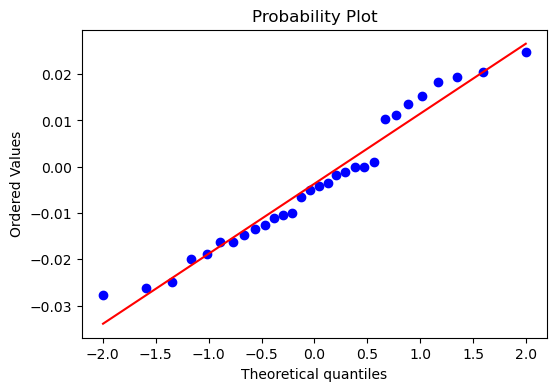

In [26]:
import scipy as sp

fig, ax = plt.subplots(figsize=(6,4))
sp.stats.probplot(residual.ravel(), plot=ax, fit=True)

In [27]:
import pickle

In [34]:
pickle.dump(model, open('model.pkl','wb'))

In [35]:
model = pickle.load(open('model.pkl','rb'))

In [ ]:
model = pickle.load(open('model.pkl','rb'))

In [ ]:
scaler.transform([[24563]])[0][0]